In [9]:
# imports
import numpy as np
import matplotlib.pyplot as plt
import random

In [10]:
class NerualNetTenth:
    '''Class for solving the a simple neural net: Selecting the tenth element of a set'''
    
    def __init__(self,nInX=10,nTrain=10,nRepeat=100):
        
        num_set=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
        
        self.num_set=num_set # Values to choose from for input
    
        self.nInX=nInX # Size of the input array
        self.nTrain=nTrain # Number of unique training data
        self.nRepeat=nRepeat # Number of times to repeat training set
        self.nTrain_rep=nTrain*nRepeat # Number of total training sets
        
        # Set the alpha value
        self.alpha=self.set_alpha()
        
        # Set up the training set 
        self.xT,self.zT,self.xT_rep,self.zT_rep=self.get_training_set()
        
        # Train the model to get A
        self.A=self.train_neural_net()
        
        # Test on the training set to get residual
        self.resid=[]
        for x in range(nTrain):
            gAx=self.apply(self.xT[x])
            self.resid.append(gAx-self.zT[x])
        self.resid=np.ndarray.flatten(np.array(self.resid))
        
    def get_training_set(self):
        '''Generate a random training set of nTrain unique input/output pairs repeated nRepeat times.'''

        xT=[]
        zT=[]
        for t in range(self.nTrain):
            x=np.random.choice(self.num_set,size=self.nInX)
            zT.append(x[9]) # Tenth element
            xT.append(list(np.array(x)-0.5)) # Subtract 0.5 to place in the nonlinear region of g

        # Duplicate the training set
        xT_rep=xT.copy()
        zT_rep=zT.copy()
        for d in range(self.nRepeat):
            xT_rep+=xT.copy()
            zT_rep+=zT.copy()
        
        # Shuffle the training set
        _tmp_xz=list(zip(xT_rep,zT_rep))
        random.shuffle(_tmp_xz)
        xT_rep,zT_rep=zip(*_tmp_xz)
        
        return xT,zT,xT_rep,zT_rep

    def set_alpha(self):
        '''Set the alpha value based on the largest value in the set of numbers'''
        return 10./(self.nInX*np.amax(np.abs(np.array(self.num_set))))
    
    
    def train_neural_net(self):
        '''Train the neural network'''
        # Tolerance and step size for convergence of the steepest descent
        tol=1e-8
        eta=0.5
        
        # Randomly initialize A matrix, 1 x size of num_set
        A=np.random.rand(1,self.nInX)

        for k in range(self.nTrain_rep):

            yk=self.zT_rep[k]
            zk=self.g(self.alpha,np.dot(A,self.xT_rep[k]))
            
            while((zk-yk)**2 > tol):
                
                delA=2*self.alpha*(zk-yk)*zk*(1.-zk)*self.xT_rep[k]
                A-=eta*delA
                zk=self.g(self.alpha,np.dot(A,self.xT_rep[k]))        

        return A
    
    def g(self,alpha,x):
        '''Sigmoid Nonlinear function'''
        return 1/(1+np.exp(-alpha*x))
    
    def apply(self,x):
        '''Apply the nerual net to some x'''
        return self.g(self.alpha,np.dot(self.A,np.array(x)))
    
    
    def new_data_set(self,nData):
        '''Test our model on a new set of data'''
        xT=[]
        zT=[]
        resid=[]
        for t in range(nData):
            x=np.random.choice(self.num_set,10)
            resid.append(self.apply(list(np.array(x)-0.5))-x[9])
            
        return resid
    

In [11]:
# Set up and train the neural network 
nn=NerualNetTenth()

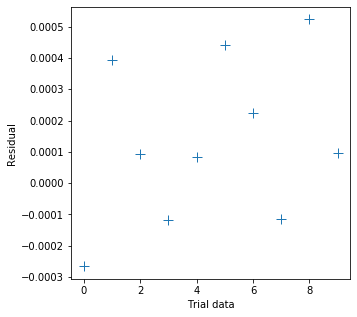

In [12]:
# Test to see that the training was perfomed correctly by plotting the residuals of the training set
fig,ax=plt.subplots(figsize=(5,5))

ax.plot(nn.resid,'+',Markersize=10)
ax.set_xlabel('Trial data')
ax.set_ylabel('Residual')

plt.savefig('train_resid.pdf',bbox_inches='tight')
plt.show()

In [13]:
# Print out the A matrix
np.set_printoptions(precision=2)
print(nn.A)

[[ 0.24 -0.43 -0.19  0.28  0.39  0.1   0.07 -0.01  0.15  4.96]]


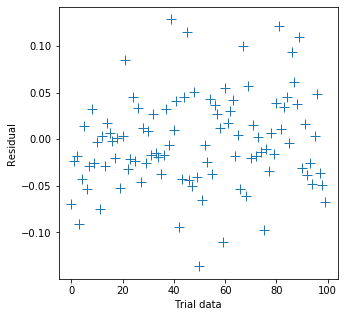

In [14]:
# Test on a new set of data
resid=nn.new_data_set(100)

fig,ax=plt.subplots(figsize=(5,5))

ax.plot(resid,'+',Markersize=10)
ax.set_xlabel('Trial data')
ax.set_ylabel('Residual')

plt.savefig('data_resid.pdf',bbox_inches='tight')
plt.show()    
